In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://github.com/MaartenGr/boardgame/raw/master/files/boardgame.csv')

In [4]:
import altair as alt
from vega_datasets import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re
# import plotly.graph_objects as go
import streamlit as st

def prepare_data_for_visualization(df):
    df = df.set_index('Date')
    grouper = df.groupby([pd.Grouper(freq='3D'), 'Game'])
    result = grouper['Game'].count().unstack('Game').fillna(0)
    for column in result.columns:
        result[column] = result[column].cumsum()
    result = result.rename({'Kingdomino ': 'Kingdomino'}, axis=1)
    result = result.resample("3D").pad()
    
    return result

def prepare_data_for_bar_race(df):
    output = df.T.copy()
    
    links = ['https://cf.geekdo-images.com/itemrep/img/hWxcNzC1olqP42dwYGjwW5qGQAs=/fit-in/246x300/pic3376065.jpg',
             'https://cdn.arstechnica.net/wp-content/uploads/2018/07/IMG_4121-800x533.jpg',
             'https://cf.geekdo-images.com/itemrep/img/PxmUXWwfs47siy6d8StJeSb482Q=/fit-in/246x300/pic3714302.jpg',
             'https://cf.geekdo-images.com/itemrep/img/PcS7t2s53VDQwkDpFxVQq_iNv0Y=/fit-in/246x300/pic4059108.jpg',
             'https://res.cloudinary.com/csicdn/image/upload/c_pad,fl_lossy,h_350,q_auto,w_350/v1/Images/Products/Misc%20Art/Czech%20Games%20Edition/full/CGE00040a.jpg',
             'https://cf.geekdo-images.com/itemrep/img/I7L1q58TvT3MWFcp-OqZgIUDdqk=/fit-in/246x300/pic4275250.jpg',
             'https://cf.geekdo-images.com/itemrep/img/VYu3d9_-pmgLdQbykJtp9RKsxZg=/fit-in/246x300/pic3496085.jpg',
             'https://images-na.ssl-images-amazon.com/images/I/91sn9iNwqbL._SX355_.jpg',
             'https://images-cdn.fantasyflightgames.com/filer_public/73/3e/733ee5ab-9728-44f1-8f33-0787f59d8c19/kf01_box_right.png',
             'https://cf.geekdo-images.com/itemrep/img/D3DLTVXuNzL8n2p9BT_2alSfbZs=/fit-in/246x300/pic3132685.png',
             'https://s.s-bol.com/imgbase0/imagebase3/extralarge/FC/3/4/4/8/1004004000008443_7.jpg',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/8/9/2/9/9200000079449298.jpg',
             'https://cf.geekdo-images.com/itemrep/img/pdmInB3HR26IwV35yj0LB6bEmD4=/fit-in/246x300/pic3979766.png',
             'https://cf.geekdo-images.com/itemrep/img/7eRwVcLlJ7KOTpGnbcdRJGRlfKk=/fit-in/246x300/pic1949286.jpg',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/4/2/2/6/9200000022076224.jpg',
             'https://cf.geekdo-images.com/itemrep/img/8ixto0VaFd6sE11Eoi4olp3Vl9I=/fit-in/246x300/pic2520016.jpg',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/6/7/4/4/1004004004574476.jpg',
             'https://www.jolie-spellen.nl/wp/wp-content/uploads/2013/08/rozenkoning-bordspel-white-goblin-games.jpg',
             'https://images-na.ssl-images-amazon.com/images/I/91irtho0CNL._SL1500_.jpg',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/1/7/2/3/9200000080483271.jpg',
             'https://i5.walmartimages.com/asr/6a31d2c3-ac74-4557-81ea-0190130f4ec7_1.be08fc7a3334f962ea5b9c318e2d81f1.png?odnHeight=450&odnWidth=450&odnBg=FFFFFF',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/7/6/2/6/9200000038446267.jpg',
             'https://cf.geekdo-images.com/itemrep/img/o1PM_RNLP721yNFmZX-SRieWpis=/fit-in/246x300/pic3348790.jpg',
             'https://cf.geekdo-images.com/itemrep/img/gZdBSpXLStMXF5s54qwZ5-5sIuY=/fit-in/246x300/pic646458.jpg',
             'https://images-na.ssl-images-amazon.com/images/I/61TwK9%2BjNUL._SL1000_.jpg',
             'https://cf.geekdo-images.com/itemrep/img/wbRpp7fVHwAbLBrQ3wBnvzUZvRM=/fit-in/246x300/pic3761012.jpg',
             'https://cf.geekdo-images.com/itemrep/img/kB0chg-5_UcxKHtsfrlRhqSWcrU=/fit-in/246x300/pic3042240.jpg']
    output['Image'] = links
    output.columns = [str(column).split(' ')[0] for column in output.columns]
    return output

    
def plot_graph(result, iloc, savefig=False):
    colors = dict(zip(
                ['7 Wonders Duel', 'Azul', 'Claim', 'Claim 2', 'Codenames Duet',
                   'Discover Lands Unknown', 'Fox in the Forest', 'Jaipur', 'KeyForge',
                   'Kingdomino', 'Machiavelli', 'Magic Maze', 'Mind', 'Port Royal',
                   'Qwixx', 'Raptor', 'Regenwormen', 'Rozenkoning', 'Santorini',
                   'Schotten Totten', 'Splendor', 'Sushi Go!', 'Unlock', 'Verboden Eiland',
                   'Vergeten Stad', 'Welcome to…', "What's up"],
                ['#90A4AE', '#E0E0E0', '#A1887F', '#FF8A65',
                 '#FFB74D', '#FFD54F', '#FFF176', '#DCE775',
                 '#AED581', '#81C784', '#4DB6AC', '#4DD0E1',
                 '#4FC3F7', '#64B5F6', '#7986CB', '#9575CD',
                 '#BA68C8', '#F06292', '#e57373', '#4DD0E1',
                 '#4FC3F7', '#64B5F6', '#7986CB', '#9575CD',
                 '#4FC3F7', '#64B5F6', '#7986CB',]
            ))

    names = result.iloc[iloc].sort_values(ascending=True).index[-10:]
    values = result.iloc[iloc].sort_values(ascending=True).values[-10:]


    indices = [i for i, x in enumerate(values) if (x == 0)]
    
    text_names = ["" if i in indices else x for i, x in enumerate(names)]
    text_names = [x if (" " not in x) else x.replace(" ", "\n") for x in text_names]
    text_names = ["Fox in\nthe forest" if x == 'Fox\nin\nthe\nForest' else x for x in text_names]
    
    time = str(result.iloc[iloc].name).split(" ")[0]

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.clear()
    ax.barh(names, values, color=[colors[x] for x in names])
    dx = max(values) / 200

    for i, (value, name) in enumerate(zip(values, text_names)):
        if "\n" in name:
            ax.text(value-dx, i-.3,     name,           size=12, weight=600, ha='right', va='bottom')
        else:
            ax.text(value-dx, i-.1,     name,           size=12, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, "", size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')

    # ... polished styles
    year = "2018"
    ax.text(1, 0.4, time, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Total', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most popular board games I played in one year',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    plt.tight_layout()
    
    if savefig:
        plt.savefig('images/image_{}.png'.format(iloc), dpi=50)
        plt.close(fig)
        
def extract_players(df):
    """ Extract a list of players"""
    player_list = df.Players.unique()
    player_list = [players.split('+') for players in player_list]
    player_list = list(set([player for sublist in player_list for player in sublist]))
    return player_list

def extract_score(row):
    """ Extract the score per person by checking whether there
    are multiple players in the game which are connected with a 
    + symbol
    """
    scores = str(row.Scores)
    
    if ("+" in scores) and (re.findall("\d+",scores)):
        scores = scores.split("+")
        
        scores_dict = {re.findall("[a-zA-Z]+", score)[0] : 
                       re.findall("\d+", score)[0] for score in scores}

        for player in scores_dict.keys():
            row[player+'_score'] = int(scores_dict[player])

    return row
            
def extract_winner(row, player_list):
    """ Extract the winner(s) per game
    """
    
    winners = str(row.Winner).split("+")
    
    for winner in winners:
        if winner in player_list:
            row[winner+"_winner"] = 1

    return row

def extract_has_score(row, player_list):
    """Check whether the game actually has a score"""
    
    scores = 0
    
    for player in player_list:
        scores += row[player+"_score"]
    
    if scores>0:
        row['has_score'] = 1

    return row

def extract_has_winner(row, player_list):
    """Check whether the game actually has a score"""
    
    for player in player_list:
        if row[player+"_winner"] == 1:
            row['has_winner'] = 1        
            return row

    return row

def extract_has_played(row, player_list):
    """Check whether a person played in the game"""
    played = str(row.Players).split("+")
    
    for player in played:
        if player in player_list:
            row[player+"_played"] = 1

    return row

## Load Data

In [2]:
df = pd.read_excel("matches.xlsx")

## Prepare Data for Exploration

In [3]:
player_list = extract_players(df); player_list
for player in player_list:
    df[player+"_score"] = 0
    df[player+"_winner"] = 0
    df[player+"_played"] = 0
df['has_score'] = 0
df['has_winner'] = 0

df = df.apply(lambda row: extract_score(row), 1)
df = df.apply(lambda row: extract_winner(row, player_list), 1)
df = df.apply(lambda row: extract_has_score(row, player_list), 1)
df = df.apply(lambda row: extract_has_winner(row, player_list), 1)
df = df.apply(lambda row: extract_has_played(row, player_list), 1)

In [4]:
# df.to_csv("boardgame.csv")

In [5]:
player_list

['IR', 'C', 'I', 'WO', 'PA', 'G', 'M', 'EV', 'DA', 'E', 'MA']

In [6]:
select_player = "M"
grouped = df.loc[(df.has_score==1) &
                 (df.has_winner==1) &
                 (df[select_player+"_played"]==1), :]
selection = grouped.groupby("Game").mean()[[select_player+'_score']].reset_index()

## Altair

In [6]:
selection.head()

,Game,M_score
0,7 Wonders Duel,52.000000
1,Azul,57.333333
2,Claim,2.250000
3,Claim 2,3.000000
4,Fox in the Forest,18.250000


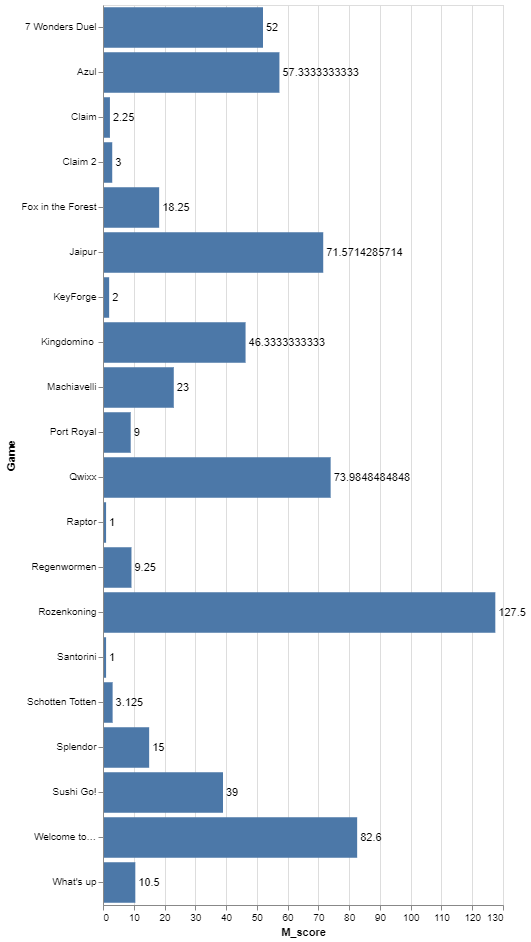

In [22]:
source = data.wheat()

bars = alt.Chart(selection).mark_bar().encode(
    x='M_score:Q',
    y="Game:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='M_score:Q'
)

(bars + text).properties(height=900)

In [8]:
df.columns

Index(['Date', 'Players', 'Game', 'Scores', 'Winner', 'Version', 'IR_score',
       'IR_winner', 'IR_played', 'M_score', 'M_winner', 'M_played', 'G_score',
       'G_winner', 'G_played', 'E_score', 'E_winner', 'E_played', 'PA_score',
       'PA_winner', 'PA_played', 'DA_score', 'DA_winner', 'DA_played',
       'EV_score', 'EV_winner', 'EV_played', 'C_score', 'C_winner', 'C_played',
       'MA_score', 'MA_winner', 'MA_played', 'I_score', 'I_winner', 'I_played',
       'WO_score', 'WO_winner', 'WO_played', 'has_score', 'has_winner'],
      dtype='object')

In [7]:
player = "M"
selected_game = "Qwixx"
selection = df.loc[df[player+"_played"]==1, :]
selection = selection.loc[(selection.Game == selected_game), :]

In [8]:
selection.head()

,Date,Players,Game,Scores,Winner,Version,IR_score,IR_winner,IR_played,C_score,...,DA_winner,DA_played,E_score,E_winner,E_played,MA_score,MA_winner,MA_played,has_score,has_winner
0,2018-11-18,I+M,Qwixx,I77+M77,I+M,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2018-11-18,I+M,Qwixx,I104+M65,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2018-11-18,I+M,Qwixx,I96+M62,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7,2018-11-22,I+M,Qwixx,I96+M78,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8,2018-11-22,I+M,Qwixx,I48+M54,M,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## Bar Race

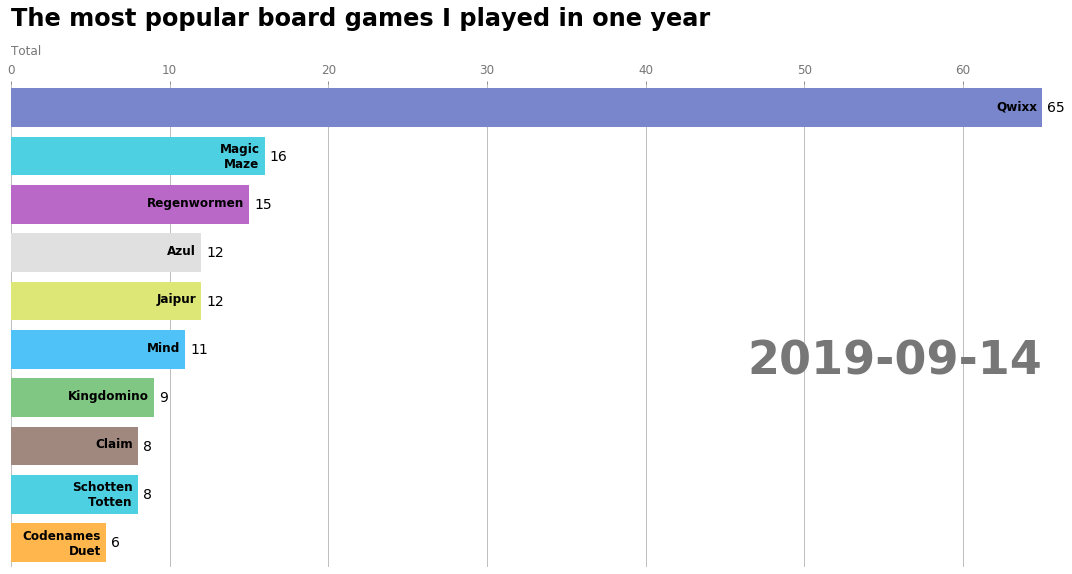

In [109]:
df_viz = prepare_data_for_visualization(df)
output = prepare_data_for_bar_race(df_viz)
plot_graph(result, 100)